In [1]:
# Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [4]:
# Load the data
tweets_df = pd.read_csv("data/tweets.csv")
tweets_df.head()

,tweets,label
0,I love working midnights tweet,1
1,I hate when I buy a bag of air and there's chi...,1
2,my grandad always sounds so ill when i speak t...,0
3,"I realize I'm annoying to everyone, so I won't...",0
4,I love when I find these dudes on vine!! #Foll...,1


In [6]:
# Check for NaN values
tweets_df.rename(columns={'tweets': 'tweet', 'label': 'is_sarcastic'}, inplace=True)
tweets_df.isna().sum()

tweet           0
is_sarcastic    0
dtype: int64

In [7]:
# Explore distribution
tweets_df['is_sarcastic'].value_counts()

0    1020
1     974
Name: is_sarcastic, dtype: int64

<Axes: xlabel='is_sarcastic', ylabel='count'>

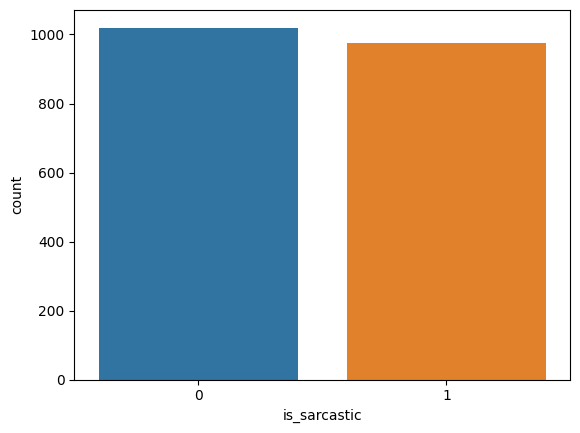

In [9]:
sns.countplot(x='is_sarcastic', data=tweets_df)

In [11]:
# Most common words in non-sarcastic tweets
tweets_df['tweet'] = tweets_df['tweet'].str.lower()
stop = set(stopwords.words('english'))
common_words_ns = ' '.join(tweets_df[tweets_df.is_sarcastic == 0].tweet).split()
common_words_ns = [word for word in common_words_ns if word not in stop]
common_words_ns = pd.Series(common_words_ns)
print(common_words_ns.value_counts()[:10])

speak     947
i'm       144
know      116
like      113
people    106
much       90
want       83
get        73
even       60
would      60
dtype: int64


In [12]:
# Most common words in sarcastic tweets
common_words_s = ' '.join(tweets_df[tweets_df.is_sarcastic == 1].tweet).split()
common_words_s = [word for word in common_words_s if word not in stop]
common_words_s = pd.Series(common_words_s)
print(common_words_s.value_counts()[:10])

#not      439
love      351
i'm       120
speak      88
good       73
like       71
people     59
get        43
know       43
day        43
dtype: int64


In [15]:
common_words_ns_df = common_words_ns.value_counts().to_frame(name="frequency_ns")
common_words_s_df = common_words_s.value_counts().to_frame(name="frequency_s")
merged_freq = pd.merge(common_words_ns_df, common_words_s_df, left_index=True, right_index=True, how="outer")
merged_freq['frequency_s'] = merged_freq['frequency_s'].fillna(0)
merged_freq['frequency_ns'] = merged_freq['frequency_ns'].fillna(0)
merged_freq["difference"] = abs(merged_freq["frequency_ns"] - merged_freq["frequency_s"])
merged_freq = merged_freq.sort_values(['difference'], ascending=[False])
merged_freq.head()

,frequency_ns,frequency_s,difference
speak,947.0,88.0,859.0
#not,0.0,439.0,439.0
love,29.0,351.0,322.0
know,116.0,43.0,73.0
much,90.0,25.0,65.0


In [16]:
def remove_stopwords(tweet):
    tweet_list = tweet.split()
    return ' '.join([word for word in tweet_list if word not in stop])

In [17]:
def tokenize(tweet):
    tokenized = word_tokenize(tweet)
    return ' '.join([word for word in tokenized])

In [18]:
# Create columns with processed version of tweets
cleaned_tweets_df = tweets_df.copy()
cleaned_tweets_df['no_stopwords'] = cleaned_tweets_df.tweet.apply(remove_stopwords)
cleaned_tweets_df['tokenized'] = cleaned_tweets_df.tweet.apply(tokenize)
cleaned_tweets_df['tokenized_no_stopwords'] = cleaned_tweets_df.no_stopwords.apply(tokenize)
cleaned_tweets_df.head()

,tweet,is_sarcastic,no_stopwords,tokenized,tokenized_no_stopwords
0,i love working midnights tweet,1,love working midnights tweet,i love working midnights tweet,love working midnights tweet
1,i hate when i buy a bag of air and there's chi...,1,hate buy bag air there's chips ðÿ˜’ #not,i hate when i buy a bag of air and there 's ch...,hate buy bag air there 's chips ðÿ˜ ’ # not
2,my grandad always sounds so ill when i speak t...,0,grandad always sounds ill speak phone,my grandad always sounds so ill when i speak t...,grandad always sounds ill speak phone
3,"i realize i'm annoying to everyone, so i won't...",0,"realize i'm annoying everyone, keep spamming y...","i realize i 'm annoying to everyone , so i wo ...","realize i 'm annoying everyone , keep spamming..."
4,i love when i find these dudes on vine!! #foll...,1,love find dudes vine!! #followme #giveaway #xb...,i love when i find these dudes on vine ! ! # f...,love find dudes vine ! ! # followme # giveaway...


In [19]:
# Save cleaned data
cleaned_tweets_df.to_csv("data/cleaned_tweets.csv")